In [4]:
import serial
import csv
import time
from datetime import datetime
from openpyxl import Workbook, load_workbook

# Configura a porta serial e a taxa de transmissão
port = 'COM11'  # Substitua pela porta correta do seu Arduino
baud_rate = 9600

ser = None
file_name = 'calibracao_dados_arduino.xlsx'  # Nome do arquivo Excel

try:
    # Abre a conexão com a porta serial
    ser = serial.Serial(port, baud_rate)
    time.sleep(2)  # Espera o Arduino inicializar

    # Tenta carregar o arquivo Excel existente ou cria um novo
    try:
        wb = load_workbook(file_name)
        # Determina o próximo índice de aba
        sheet_index = len(wb.sheetnames) + 1
    except FileNotFoundError:
        wb = Workbook()
        sheet_index = 1

    # Cria uma nova aba para a rodada de teste atual
    sheet_name = f'Teste_{sheet_index}'
    ws = wb.create_sheet(title=sheet_name)
    ws.append(['Hora', 'Temperatura'])  # Cabeçalho da nova aba

    print(f"Conectado à porta {port}. Começando a coleta de dados...")

    while True:
        try:
            # Lê dados da porta serial
            line = ser.readline().decode('utf-8').strip()
            if line:
                parts = line.split(',')
                if len(parts) == 2:
                    temperatura = parts[0].split(':')[1].strip()
                    hora_atual = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                    # Escreve os dados na aba do arquivo Excel
                    ws.append([hora_atual, temperatura])
                    print(f"Temperatura: {temperatura}, Hora: {hora_atual}")
        except Exception as e:
            print(f"Erro ao ler dados: {e}")

except serial.SerialException as e:
    print(f"Erro ao abrir a porta serial: {e}")

finally:
    # Salva o arquivo Excel
    wb.save(file_name)
    if ser and ser.is_open:
        ser.close()


Conectado à porta COM11. Começando a coleta de dados...


KeyboardInterrupt: 

In [3]:
import serial
import csv
import time
from datetime import datetime
from openpyxl import Workbook, load_workbook

# Configura a porta serial e a taxa de transmissão
port = 'COM11'  # Substitua pela porta correta do seu Arduino
baud_rate = 9600

ser = None
file_name = 'dados_arduino.xlsx'  # Nome do arquivo Excel

try:
    # Abre a conexão com a porta serial
    ser = serial.Serial(port, baud_rate)
    time.sleep(2)  # Espera o Arduino inicializar

    # Tenta carregar o arquivo Excel existente ou cria um novo
    try:
        wb = load_workbook(file_name)
        # Determina o próximo índice de aba
        sheet_index = len(wb.sheetnames) + 1
    except FileNotFoundError:
        wb = Workbook()
        sheet_index = 1

    # Cria uma nova aba para a rodada de teste atual
    sheet_name = f'Teste_{sheet_index}'
    ws = wb.create_sheet(title=sheet_name)
    ws.append(['Hora', 'Temperatura'])  # Cabeçalho da nova aba

    print(f"Conectado à porta {port}. Começando a coleta de dados...")

    while True:
        try:
            # Lê dados da porta serial
            line = ser.readline().decode('utf-8').strip()
            if line:
                parts = line.split(',')
                if len(parts) == 2:
                    temperatura = parts[0].split(':')[1].strip()
                    hora_atual = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                    # Escreve os dados na aba do arquivo Excel
                    ws.append([hora_atual, temperatura])
                    print(f"Temperatura: {temperatura}, Hora: {hora_atual}")
        except Exception as e:
            print(f"Erro ao ler dados: {e}")

except serial.SerialException as e:
    print(f"Erro ao abrir a porta serial: {e}")

finally:
    # Salva o arquivo Excel
    wb.save(file_name)
    if ser and ser.is_open:
        ser.close()


Conectado à porta COM11. Começando a coleta de dados...


KeyboardInterrupt: 

In [ ]:
import serial
import csv
import time
from datetime import datetime
from openpyxl import Workbook, load_workbook

# Configura a porta serial e a taxa de transmissão
port = 'COM11'  # Substitua pela porta correta do seu Arduino
baud_rate = 9600

ser = None
file_name = 'calibracao_dados_arduino.xlsx'  # Nome do arquivo Excel

try:
    # Abre a conexão com a porta serial
    ser = serial.Serial(port, baud_rate)
    time.sleep(2)  # Espera o Arduino inicializar

    # Tenta carregar o arquivo Excel existente ou cria um novo
    try:
        wb = load_workbook(file_name)
        # Determina o próximo índice de aba
        sheet_index = len(wb.sheetnames) + 1
    except FileNotFoundError:
        wb = Workbook()
        sheet_index = 1

    # Cria uma nova aba para a rodada de teste atual
    sheet_name = f'Teste_{sheet_index}'
    ws = wb.create_sheet(title=sheet_name)
    # Cabeçalho para as colunas de tempo, temperatura MAX6675 e NTC 10k
    ws.append(['Hora', 'Temperatura MAX6675 (C)', 'Temperatura NTC 10k (C)'])

    print(f"Conectado à porta {port}. Começando a coleta de dados...")

    while True:
        try:
            # Lê dados da porta serial
            line = ser.readline().decode('utf-8').strip()
            if line:
                parts = line.split(',')
                if len(parts) == 2:
                    # Extrai as duas temperaturas recebidas do Arduino
                    temp_max6675 = parts[0].split(':')[1].strip()  # Temperatura do MAX6675
                    temp_ntc = parts[1].split(':')[1].strip()      # Temperatura do NTC 10k
                    hora_atual = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                    
                    # Escreve os dados na aba do arquivo Excel
                    ws.append([hora_atual, temp_max6675, temp_ntc])
                    print(f"Hora: {hora_atual}, Temp MAX6675: {temp_max6675} C, Temp NTC: {temp_ntc} C")
        except Exception as e:
            print(f"Erro ao ler dados: {e}")

except serial.SerialException as e:
    print(f"Erro ao abrir a porta serial: {e}")

finally:
    # Salva o arquivo Excel
    wb.save(file_name)
    if ser and ser.is_open:
        ser.close()
 

In [12]:
import serial
import time
from datetime import datetime
from openpyxl import Workbook, load_workbook

# Configura a porta serial e a taxa de transmissão
port = 'COM11'  # Substitua pela porta correta do seu Arduino
baud_rate = 9600

ser = None
file_name = 'datalogger_temperatura.xlsx'  # Nome do arquivo Excel

try:
    # Abre a conexão com a porta serial
    ser = serial.Serial(port, baud_rate)
    time.sleep(2)  # Espera o Arduino inicializar

    # Tenta carregar o arquivo Excel existente ou cria um novo
    try:
        wb = load_workbook(file_name)
    except FileNotFoundError:
        wb = Workbook()

    # Cria uma nova aba com a data atual como nome
    data_atual = datetime.now().strftime('%Y-%m-%d' '%H'%M:%S')  # Nome da aba com a data
    ws = wb.create_sheet(title=data_atual)
    
    # Cabeçalho para as colunas: Hora no eixo X e Temperaturas nas colunas seguintes
    ws.append(['Hora', 'Temp. In (C)', 'Temp. Out 10k (C)'])

    print(f"Conectado à porta {port}. Começando a coleta de dados...")
    print(f"Data e Hora do Inicio: {data_atual}")

    while True:
        try:
            # Lê dados da porta serial
            line = ser.readline().decode('utf-8').strip()
            if line:
                parts = line.split(',')
                if len(parts) == 2:
                    # Extrai as duas temperaturas recebidas do Arduino
                    temp_max6675 = parts[0].split(':')[1].strip()  # Temperatura do MAX6675
                    temp_ntc = parts[1].split(':')[1].strip()      # Temperatura do NTC 10k
                    hora_atual = datetime.now().strftime('%M:%S')  # Hora atual no formato MM:SS
                    
                    # Escreve os dados na aba do arquivo Excel
                    ws.append([hora_atual, temp_max6675, temp_ntc])
                    print(f"Hora: {hora_atual}, Temp In: {temp_max6675}, Temp Out: {temp_ntc}")
        except Exception as e:
            print(f"Erro ao ler dados: {e}")

except serial.SerialException as e:
    print(f"Erro ao abrir a porta serial: {e}")

finally:
    # Salva o arquivo Excel
    wb.save(file_name)
    if ser and ser.is_open:
        ser.close()


SyntaxError: invalid syntax (3911080238.py, line 25)

ESSE AQUI 

In [13]:
import serial
import time
from datetime import datetime
from openpyxl import Workbook, load_workbook

# Configura a porta serial e a taxa de transmissão
port = 'COM11'  # Substitua pela porta correta do seu Arduino
baud_rate = 9600

ser = None
file_name = 'calibracao_dados_arduino.xlsx'  # Nome do arquivo Excel

try:
    # Abre a conexão com a porta serial
    ser = serial.Serial(port, baud_rate)
    time.sleep(2)  # Espera o Arduino inicializar

    # Tenta carregar o arquivo Excel existente ou cria um novo
    try:
        wb = load_workbook(file_name)
        # Determina o próximo índice de aba
        sheet_index = len(wb.sheetnames) + 1
    except FileNotFoundError:
        wb = Workbook()
        sheet_index = 1

    # Cria uma nova aba para a rodada de teste atual
    sheet_name = f'Teste_{sheet_index}'
    ws = wb.create_sheet(title=sheet_name)
    # Cabeçalho para as colunas de tempo, temperatura MAX6675 e NTC 10k
    ws.append(['Hora', 'Temperatura Bruta (C)', 'Temperatura Corrigida (C)', 'Temperatura Ambiente (C)'])

    print(f"Conectado à porta {port}. Começando a coleta de dados...")

    while True:
        try:
            # Lê dados da porta serial
            line = ser.readline().decode('utf-8').strip()
            if line:
                # Supondo que a linha tenha este formato:
                # Temp. Bruta: 25.0 C, Temp. Corrigida: 20.0 C, Temp. Ambiente: 22.0 C
                if "Temp. Bruta" in line:
                    print(f"Recebido: {line}")
                    parts = line.split(',')
                    # Extrai as temperaturas
                    temp_bruta = parts[0].split(':')[1].strip().split()[0]  # Temperatura Bruta
                    temp_corrigida = parts[1].split(':')[1].strip().split()[0]  # Temperatura Corrigida
                    temp_ambiente = parts[2].split(':')[1].strip().split()[0]  # Temperatura Ambiente
                    hora_atual = datetime.now().strftime('%Y-%m-%d %H:%M')  # Formato de hora sem segundos
                    
                    # Escreve os dados na aba do arquivo Excel
                    ws.append([hora_atual, temp_bruta, temp_corrigida, temp_ambiente])
                    print(f"Hora: {hora_atual}, Temp Bruta: {temp_bruta} C, Temp Corrigida: {temp_corrigida} C, Temp Ambiente: {temp_ambiente} C")
        except Exception as e:
            print(f"Erro ao ler dados: {e}")

except serial.SerialException as e:
    print(f"Erro ao abrir a porta serial: {e}")

finally:
    # Salva o arquivo Excel
    wb.save(file_name)
    if ser and ser.is_open:
        ser.close()


Conectado à porta COM11. Começando a coleta de dados...
Recebido: Temp. Bruta: 0.00 C, Temp. Corrigida: -2.23 C, Temp. Ambiente: 34.70 C
Hora: 2024-10-23 10:55, Temp Bruta: 0.00 C, Temp Corrigida: -2.23 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 41.75 C, Temp. Corrigida: 36.93 C, Temp. Ambiente: 34.21 C
Hora: 2024-10-23 10:55, Temp Bruta: 41.75 C, Temp Corrigida: 36.93 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 42.00 C, Temp. Corrigida: 37.16 C, Temp. Ambiente: 35.19 C
Hora: 2024-10-23 10:55, Temp Bruta: 42.00 C, Temp Corrigida: 37.16 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 42.00 C, Temp. Corrigida: 37.16 C, Temp. Ambiente: 34.21 C
Hora: 2024-10-23 10:55, Temp Bruta: 42.00 C, Temp Corrigida: 37.16 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 41.75 C, Temp. Corrigida: 36.93 C, Temp. Ambiente: 33.72 C
Hora: 2024-10-23 10:55, Temp Bruta: 41.75 C, Temp Corrigida: 36.93 C, Temp Ambiente: 33.72 C
Recebido: Temp. Bruta: 41.75 C, Temp. Corrigida: 36.93 C, Temp. Ambient

Recebido: Temp. Bruta: 43.00 C, Temp. Corrigida: 38.10 C, Temp. Ambiente: 33.72 C
Hora: 2024-10-23 10:55, Temp Bruta: 43.00 C, Temp Corrigida: 38.10 C, Temp Ambiente: 33.72 C
Recebido: Temp. Bruta: 43.00 C, Temp. Corrigida: 38.10 C, Temp. Ambiente: 34.70 C
Hora: 2024-10-23 10:55, Temp Bruta: 43.00 C, Temp Corrigida: 38.10 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 43.00 C, Temp. Corrigida: 38.10 C, Temp. Ambiente: 34.70 C
Hora: 2024-10-23 10:55, Temp Bruta: 43.00 C, Temp Corrigida: 38.10 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 43.00 C, Temp. Corrigida: 38.10 C, Temp. Ambiente: 34.21 C
Hora: 2024-10-23 10:55, Temp Bruta: 43.00 C, Temp Corrigida: 38.10 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 43.00 C, Temp. Corrigida: 38.10 C, Temp. Ambiente: 34.21 C
Hora: 2024-10-23 10:55, Temp Bruta: 43.00 C, Temp Corrigida: 38.10 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 43.00 C, Temp. Corrigida: 38.10 C, Temp. Ambiente: 33.72 C
Hora: 2024-10-23 10:55, Temp Bruta: 43.00 C

Recebido: Temp. Bruta: 43.50 C, Temp. Corrigida: 38.57 C, Temp. Ambiente: 34.21 C
Hora: 2024-10-23 10:55, Temp Bruta: 43.50 C, Temp Corrigida: 38.57 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 43.25 C, Temp. Corrigida: 38.34 C, Temp. Ambiente: 35.19 C
Hora: 2024-10-23 10:55, Temp Bruta: 43.25 C, Temp Corrigida: 38.34 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 43.50 C, Temp. Corrigida: 38.57 C, Temp. Ambiente: 34.21 C
Hora: 2024-10-23 10:55, Temp Bruta: 43.50 C, Temp Corrigida: 38.57 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 43.00 C, Temp. Corrigida: 38.10 C, Temp. Ambiente: 34.21 C
Hora: 2024-10-23 10:55, Temp Bruta: 43.00 C, Temp Corrigida: 38.10 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 43.25 C, Temp. Corrigida: 38.34 C, Temp. Ambiente: 35.19 C
Hora: 2024-10-23 10:55, Temp Bruta: 43.25 C, Temp Corrigida: 38.34 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 43.00 C, Temp. Corrigida: 38.10 C, Temp. Ambiente: 34.21 C
Hora: 2024-10-23 10:55, Temp Bruta: 43.00 C

Recebido: Temp. Bruta: 42.75 C, Temp. Corrigida: 37.87 C, Temp. Ambiente: 33.72 C
Hora: 2024-10-23 10:55, Temp Bruta: 42.75 C, Temp Corrigida: 37.87 C, Temp Ambiente: 33.72 C
Recebido: Temp. Bruta: 43.50 C, Temp. Corrigida: 38.57 C, Temp. Ambiente: 34.70 C
Hora: 2024-10-23 10:55, Temp Bruta: 43.50 C, Temp Corrigida: 38.57 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 43.25 C, Temp. Corrigida: 38.34 C, Temp. Ambiente: 34.21 C
Hora: 2024-10-23 10:55, Temp Bruta: 43.25 C, Temp Corrigida: 38.34 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 43.50 C, Temp. Corrigida: 38.57 C, Temp. Ambiente: 34.21 C
Hora: 2024-10-23 10:55, Temp Bruta: 43.50 C, Temp Corrigida: 38.57 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 43.75 C, Temp. Corrigida: 38.80 C, Temp. Ambiente: 35.19 C
Hora: 2024-10-23 10:55, Temp Bruta: 43.75 C, Temp Corrigida: 38.80 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 43.50 C, Temp. Corrigida: 38.57 C, Temp. Ambiente: 33.72 C
Hora: 2024-10-23 10:55, Temp Bruta: 43.50 C

PermissionError: [Errno 13] Permission denied: 'calibracao_dados_arduino.xlsx'

In [ ]:
import serial
import time
from datetime import datetime
from openpyxl import Workbook, load_workbook

# Configura a porta serial e a taxa de transmissão
port = 'COM11'  # Substitua pela porta correta do seu Arduino
baud_rate = 9600

ser = None
file_name = 'calibracao_dados_arduino.xlsx'  # Nome do arquivo Excel

try:
    # Abre a conexão com a porta serial
    ser = serial.Serial(port, baud_rate)
    time.sleep(2)  # Espera o Arduino inicializar

    # Tenta carregar o arquivo Excel existente ou cria um novo
    try:
        wb = load_workbook(file_name)
        # Determina o próximo índice de aba
        sheet_index = len(wb.sheetnames) + 1
    except FileNotFoundError:
        wb = Workbook()
        sheet_index = 1

    # Cria uma nova aba para a rodada de teste atual
    sheet_name = f'Teste_{sheet_index}'
    ws = wb.create_sheet(title=sheet_name)
    
    # Cabeçalho para as colunas de Data, Hora, Temperatura Bruta, Temperatura Corrigida e Temperatura Ambiente
    ws.append(['Data', 'Hora', 'Temperatura Bruta (C)', 'Temperatura Corrigida (C)', 'Temperatura Ambiente (C)'])

    print(f"Conectado à porta {port}. Começando a coleta de dados...")

    while True:
        try:
            # Lê dados da porta serial
            line = ser.readline().decode('utf-8').strip()
            if line:
                # Supondo que a linha tenha este formato:
                # Temp. Bruta: 25.0 C, Temp. Corrigida: 20.0 C, Temp. Ambiente: 22.0 C
                if "Temp. Bruta" in line:
                    print(f"Recebido: {line}")
                    parts = line.split(',')
                    # Extrai as temperaturas
                    temp_bruta = parts[0].split(':')[1].strip().split()[0]  # Temperatura Bruta
                    temp_corrigida = parts[1].split(':')[1].strip().split()[0]  # Temperatura Corrigida
                    temp_ambiente = parts[2].split(':')[1].strip().split()[0]  # Temperatura Ambiente
                    
                    # Obtém a data e a hora (sem segundos)
                    data_atual = datetime.now().strftime('%Y-%m-%d')  # Formato da data
                    hora_atual = datetime.now().strftime('%H:%M')     # Formato da hora sem segundos
                    
                    # Escreve os dados na aba do arquivo Excel
                    ws.append([data_atual, hora_atual, temp_bruta, temp_corrigida, temp_ambiente])
                    
                    # Exibe os dados no terminal
                    print(f"Data: {data_atual}, Hora: {hora_atual}, Temp Bruta: {temp_bruta} C, Temp Corrigida: {temp_corrigida} C, Temp Ambiente: {temp_ambiente} C")
        except Exception as e:
            print(f"Erro ao ler dados: {e}")

except serial.SerialException as e:
    print(f"Erro ao abrir a porta serial: {e}")

finally:
    # Salva o arquivo Excel
    wb.save(file_name)
    if ser and ser.is_open:
        ser.close()


Conectado à porta COM11. Começando a coleta de dados...
Recebido: Temp. Bruta: 0.00 C, Temp. Corrigida: -2.23 C, Temp. Ambiente: 34.21 C
Data: 2024-10-23, Hora: 11:32, Temp Bruta: 0.00 C, Temp Corrigida: -2.23 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 34.75 C, Temp. Corrigida: 30.36 C, Temp. Ambiente: 33.72 C
Data: 2024-10-23, Hora: 11:32, Temp Bruta: 34.75 C, Temp Corrigida: 30.36 C, Temp Ambiente: 33.72 C
Recebido: Temp. Bruta: 35.25 C, Temp. Corrigida: 30.83 C, Temp. Ambiente: 34.21 C
Data: 2024-10-23, Hora: 11:32, Temp Bruta: 35.25 C, Temp Corrigida: 30.83 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 35.50 C, Temp. Corrigida: 31.07 C, Temp. Ambiente: 34.70 C
Data: 2024-10-23, Hora: 11:32, Temp Bruta: 35.50 C, Temp Corrigida: 31.07 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 35.50 C, Temp. Corrigida: 31.07 C, Temp. Ambiente: 34.21 C
Data: 2024-10-23, Hora: 11:32, Temp Bruta: 35.50 C, Temp Corrigida: 31.07 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 35.75 C, Temp

Recebido: Temp. Bruta: 36.75 C, Temp. Corrigida: 32.24 C, Temp. Ambiente: 34.21 C
Data: 2024-10-23, Hora: 11:32, Temp Bruta: 36.75 C, Temp Corrigida: 32.24 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 37.00 C, Temp. Corrigida: 32.47 C, Temp. Ambiente: 35.19 C
Data: 2024-10-23, Hora: 11:32, Temp Bruta: 37.00 C, Temp Corrigida: 32.47 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 37.00 C, Temp. Corrigida: 32.47 C, Temp. Ambiente: 33.24 C
Data: 2024-10-23, Hora: 11:32, Temp Bruta: 37.00 C, Temp Corrigida: 32.47 C, Temp Ambiente: 33.24 C
Recebido: Temp. Bruta: 36.50 C, Temp. Corrigida: 32.00 C, Temp. Ambiente: 33.72 C
Data: 2024-10-23, Hora: 11:32, Temp Bruta: 36.50 C, Temp Corrigida: 32.00 C, Temp Ambiente: 33.72 C
Recebido: Temp. Bruta: 36.25 C, Temp. Corrigida: 31.77 C, Temp. Ambiente: 34.21 C
Data: 2024-10-23, Hora: 11:32, Temp Bruta: 36.25 C, Temp Corrigida: 31.77 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 37.00 C, Temp. Corrigida: 32.47 C, Temp. Ambiente: 34.70 C
Data: 20

Recebido: Temp. Bruta: 37.25 C, Temp. Corrigida: 32.71 C, Temp. Ambiente: 35.19 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.25 C, Temp Corrigida: 32.71 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 37.00 C, Temp. Corrigida: 32.47 C, Temp. Ambiente: 33.72 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.00 C, Temp Corrigida: 32.47 C, Temp Ambiente: 33.72 C
Recebido: Temp. Bruta: 37.00 C, Temp. Corrigida: 32.47 C, Temp. Ambiente: 33.72 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.00 C, Temp Corrigida: 32.47 C, Temp Ambiente: 33.72 C
Recebido: Temp. Bruta: 36.75 C, Temp. Corrigida: 32.24 C, Temp. Ambiente: 34.21 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 36.75 C, Temp Corrigida: 32.24 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 37.00 C, Temp. Corrigida: 32.47 C, Temp. Ambiente: 33.72 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.00 C, Temp Corrigida: 32.47 C, Temp Ambiente: 33.72 C
Recebido: Temp. Bruta: 37.00 C, Temp. Corrigida: 32.47 C, Temp. Ambiente: 34.21 C
Data: 20

Recebido: Temp. Bruta: 37.00 C, Temp. Corrigida: 32.47 C, Temp. Ambiente: 34.21 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.00 C, Temp Corrigida: 32.47 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 37.00 C, Temp. Corrigida: 32.47 C, Temp. Ambiente: 35.19 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.00 C, Temp Corrigida: 32.47 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 36.50 C, Temp. Corrigida: 32.00 C, Temp. Ambiente: 34.70 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 36.50 C, Temp Corrigida: 32.00 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 36.75 C, Temp. Corrigida: 32.24 C, Temp. Ambiente: 33.72 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 36.75 C, Temp Corrigida: 32.24 C, Temp Ambiente: 33.72 C
Recebido: Temp. Bruta: 36.75 C, Temp. Corrigida: 32.24 C, Temp. Ambiente: 34.21 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 36.75 C, Temp Corrigida: 32.24 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 37.25 C, Temp. Corrigida: 32.71 C, Temp. Ambiente: 34.70 C
Data: 20

Recebido: Temp. Bruta: 37.25 C, Temp. Corrigida: 32.71 C, Temp. Ambiente: 34.70 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.25 C, Temp Corrigida: 32.71 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 37.25 C, Temp. Corrigida: 32.71 C, Temp. Ambiente: 34.21 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.25 C, Temp Corrigida: 32.71 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 37.25 C, Temp. Corrigida: 32.71 C, Temp. Ambiente: 35.19 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.25 C, Temp Corrigida: 32.71 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 37.25 C, Temp. Corrigida: 32.71 C, Temp. Ambiente: 34.70 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.25 C, Temp Corrigida: 32.71 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 37.25 C, Temp. Corrigida: 32.71 C, Temp. Ambiente: 34.70 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.25 C, Temp Corrigida: 32.71 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 37.25 C, Temp. Corrigida: 32.71 C, Temp. Ambiente: 34.21 C
Data: 20

Recebido: Temp. Bruta: 37.00 C, Temp. Corrigida: 32.47 C, Temp. Ambiente: 34.70 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.00 C, Temp Corrigida: 32.47 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 37.25 C, Temp. Corrigida: 32.71 C, Temp. Ambiente: 34.21 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.25 C, Temp Corrigida: 32.71 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 37.00 C, Temp. Corrigida: 32.47 C, Temp. Ambiente: 34.21 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.00 C, Temp Corrigida: 32.47 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 37.50 C, Temp. Corrigida: 32.94 C, Temp. Ambiente: 34.21 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.50 C, Temp Corrigida: 32.94 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 36.75 C, Temp. Corrigida: 32.24 C, Temp. Ambiente: 33.72 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 36.75 C, Temp Corrigida: 32.24 C, Temp Ambiente: 33.72 C
Recebido: Temp. Bruta: 37.50 C, Temp. Corrigida: 32.94 C, Temp. Ambiente: 34.21 C
Data: 20

Recebido: Temp. Bruta: 37.50 C, Temp. Corrigida: 32.94 C, Temp. Ambiente: 34.70 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.50 C, Temp Corrigida: 32.94 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 37.75 C, Temp. Corrigida: 33.18 C, Temp. Ambiente: 33.72 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.75 C, Temp Corrigida: 33.18 C, Temp Ambiente: 33.72 C
Recebido: Temp. Bruta: 37.25 C, Temp. Corrigida: 32.71 C, Temp. Ambiente: 34.21 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.25 C, Temp Corrigida: 32.71 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 37.50 C, Temp. Corrigida: 32.94 C, Temp. Ambiente: 33.72 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.50 C, Temp Corrigida: 32.94 C, Temp Ambiente: 33.72 C
Recebido: Temp. Bruta: 37.25 C, Temp. Corrigida: 32.71 C, Temp. Ambiente: 34.70 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.25 C, Temp Corrigida: 32.71 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 37.25 C, Temp. Corrigida: 32.71 C, Temp. Ambiente: 35.19 C
Data: 20

Recebido: Temp. Bruta: 37.50 C, Temp. Corrigida: 32.94 C, Temp. Ambiente: 33.72 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.50 C, Temp Corrigida: 32.94 C, Temp Ambiente: 33.72 C
Recebido: Temp. Bruta: 37.50 C, Temp. Corrigida: 32.94 C, Temp. Ambiente: 33.72 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.50 C, Temp Corrigida: 32.94 C, Temp Ambiente: 33.72 C
Recebido: Temp. Bruta: 37.75 C, Temp. Corrigida: 33.18 C, Temp. Ambiente: 34.70 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.75 C, Temp Corrigida: 33.18 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 37.50 C, Temp. Corrigida: 32.94 C, Temp. Ambiente: 35.19 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.50 C, Temp Corrigida: 32.94 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 37.75 C, Temp. Corrigida: 33.18 C, Temp. Ambiente: 35.19 C
Data: 2024-10-23, Hora: 11:33, Temp Bruta: 37.75 C, Temp Corrigida: 33.18 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 37.00 C, Temp. Corrigida: 32.47 C, Temp. Ambiente: 34.70 C
Data: 20

Recebido: Temp. Bruta: 37.75 C, Temp. Corrigida: 33.18 C, Temp. Ambiente: 34.21 C
Data: 2024-10-23, Hora: 11:34, Temp Bruta: 37.75 C, Temp Corrigida: 33.18 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 37.75 C, Temp. Corrigida: 33.18 C, Temp. Ambiente: 35.19 C
Data: 2024-10-23, Hora: 11:34, Temp Bruta: 37.75 C, Temp Corrigida: 33.18 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 37.75 C, Temp. Corrigida: 33.18 C, Temp. Ambiente: 35.19 C
Data: 2024-10-23, Hora: 11:34, Temp Bruta: 37.75 C, Temp Corrigida: 33.18 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 37.75 C, Temp. Corrigida: 33.18 C, Temp. Ambiente: 34.21 C
Data: 2024-10-23, Hora: 11:34, Temp Bruta: 37.75 C, Temp Corrigida: 33.18 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 37.50 C, Temp. Corrigida: 32.94 C, Temp. Ambiente: 33.72 C
Data: 2024-10-23, Hora: 11:34, Temp Bruta: 37.50 C, Temp Corrigida: 32.94 C, Temp Ambiente: 33.72 C
Recebido: Temp. Bruta: 37.75 C, Temp. Corrigida: 33.18 C, Temp. Ambiente: 34.21 C
Data: 20

Recebido: Temp. Bruta: 37.50 C, Temp. Corrigida: 32.94 C, Temp. Ambiente: 34.21 C
Data: 2024-10-23, Hora: 11:34, Temp Bruta: 37.50 C, Temp Corrigida: 32.94 C, Temp Ambiente: 34.21 C
Recebido: Temp. Bruta: 37.50 C, Temp. Corrigida: 32.94 C, Temp. Ambiente: 33.72 C
Data: 2024-10-23, Hora: 11:34, Temp Bruta: 37.50 C, Temp Corrigida: 32.94 C, Temp Ambiente: 33.72 C
Recebido: Temp. Bruta: 37.75 C, Temp. Corrigida: 33.18 C, Temp. Ambiente: 35.19 C
Data: 2024-10-23, Hora: 11:34, Temp Bruta: 37.75 C, Temp Corrigida: 33.18 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 37.50 C, Temp. Corrigida: 32.94 C, Temp. Ambiente: 34.70 C
Data: 2024-10-23, Hora: 11:34, Temp Bruta: 37.50 C, Temp Corrigida: 32.94 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 37.50 C, Temp. Corrigida: 32.94 C, Temp. Ambiente: 33.72 C
Data: 2024-10-23, Hora: 11:34, Temp Bruta: 37.50 C, Temp Corrigida: 32.94 C, Temp Ambiente: 33.72 C
Recebido: Temp. Bruta: 38.00 C, Temp. Corrigida: 33.41 C, Temp. Ambiente: 34.70 C
Data: 20

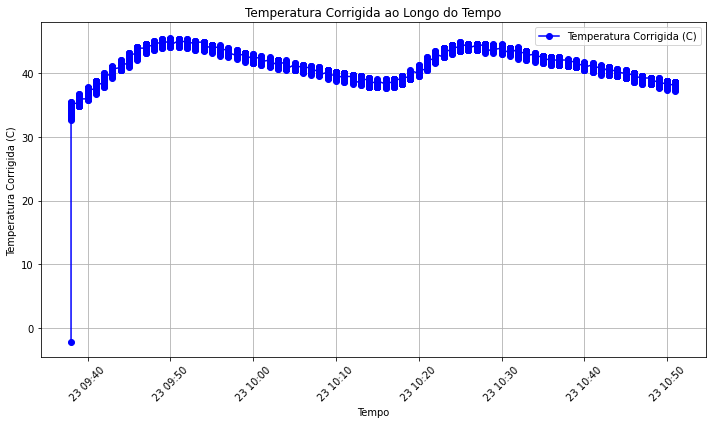

In [11]:
import matplotlib.pyplot as plt
import openpyxl
from datetime import datetime

# Nome do arquivo Excel
file_name = 'calibracao_dados_arduino.xlsx'

# Carrega o arquivo Excel
wb = openpyxl.load_workbook(file_name)
# Seleciona a aba mais recente (última aba)
ws = wb[wb.sheetnames[-1]]

# Listas para armazenar os dados
horas = []
temperaturas_corrigidas = []

# Percorre as linhas da aba, ignorando o cabeçalho
for row in ws.iter_rows(min_row=2, values_only=True):
    hora_str, _, temp_corrigida, _ = row  # Pegamos apenas a hora e a temperatura corrigida
    # Converte a string da hora para um objeto datetime
    hora = datetime.strptime(hora_str, '%Y-%m-%d %H:%M')
    # Adiciona os dados às listas
    horas.append(hora)
    temperaturas_corrigidas.append(float(temp_corrigida))

# Plota o gráfico
plt.figure(figsize=(10, 6))
plt.plot(horas, temperaturas_corrigidas, label='Temperatura Corrigida (C)', color='b', marker='o')

# Configurações do gráfico
plt.title('Temperatura Corrigida ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Temperatura Corrigida (C)')
plt.grid(True)
plt.legend()

# Rotaciona os rótulos do eixo X para melhorar a visualização
plt.xticks(rotation=45)
plt.tight_layout()

# Mostra o gráfico
plt.show()


In [ ]:
import serial
import time
from datetime import datetime
from openpyxl import Workbook, load_workbook

# Configura a porta serial e a taxa de transmissão
port = 'COM11'  # Substitua pela porta correta do seu Arduino
baud_rate = 9600

ser = None
file_name = 'calibracao_dados_arduino.xlsx'  # Nome do arquivo Excel

# Configurações do controle de temperatura
setpoint = 72.0  # Define o setpoint da temperatura
histerese = 2.0  # Define a faixa de histerese

def controla_resistencia(temperatura_corrigida):
    """
    Função para controlar a resistência baseado no setpoint e histerese.
    Se a temperatura corrigida for maior que o setpoint, desliga a resistência.
    Se a temperatura corrigida for menor que o setpoint, liga a resistência.
    """
    if temperatura_corrigida > setpoint + histerese:
        # Desliga a resistência se estiver acima do setpoint + histerese
        print("Desligando a resistência")
        # Aqui você adicionaria o código para desligar a resistência, por exemplo:
        # digitalWrite(RELE_RESISTENCIA, HIGH)  # ou outro comando para desligar
        return "Desligada"
    elif temperatura_corrigida < setpoint - histerese:
        # Liga a resistência se estiver abaixo do setpoint - histerese
        print("Ligando a resistência")
        # Aqui você adicionaria o código para ligar a resistência, por exemplo:
        # digitalWrite(RELE_RESISTENCIA, LOW)  # ou outro comando para ligar
        return "Ligada"
    else:
        # Caso esteja na faixa de histerese, mantém o estado atual
        print("Mantendo o estado atual da resistência")
        return "Mantida"

try:
    # Abre a conexão com a porta serial
    ser = serial.Serial(port, baud_rate)
    time.sleep(2)  # Espera o Arduino inicializar

    # Tenta carregar o arquivo Excel existente ou cria um novo
    try:
        wb = load_workbook(file_name)
        # Determina o próximo índice de aba
        sheet_index = len(wb.sheetnames) + 1
    except FileNotFoundError:
        wb = Workbook()
        sheet_index = 1

    # Cria uma nova aba para a rodada de teste atual
    sheet_name = f'Teste_{sheet_index}'
    ws = wb.create_sheet(title=sheet_name)
    
    # Cabeçalho para as colunas de Hora, Temperatura Bruta, Temperatura Corrigida, Temperatura Ambiente, Estado da Resistência
    ws.append(['Hora', 'Temperatura Bruta (C)', 'Temperatura Corrigida (C)', 'Temperatura Ambiente (C)', 'Estado da Resistência'])

    print(f"Conectado à porta {port}. Começando a coleta de dados...")

    while True:
        try:
            # Lê dados da porta serial
            line = ser.readline().decode('utf-8').strip()
            if line:
                # Supondo que a linha tenha este formato:
                # Temp. Bruta: 25.0 C, Temp. Corrigida: 20.0 C, Temp. Ambiente: 22.0 C
                if "Temp. Bruta" in line:
                    print(f"Recebido: {line}")
                    parts = line.split(',')
                    # Extrai as temperaturas
                    temp_bruta = parts[0].split(':')[1].strip().split()[0]  # Temperatura Bruta
                    temp_corrigida = float(parts[1].split(':')[1].strip().split()[0])  # Temperatura Corrigida
                    temp_ambiente = parts[2].split(':')[1].strip().split()[0]  # Temperatura Ambiente
                    
                    # Obtém a hora atual (sem segundos)
                    hora_atual = datetime.now().strftime('%H:%M')
                    
                    # Controla o estado da resistência com base na temperatura corrigida
                    estado_resistencia = controla_resistencia(temp_corrigida)
                    
                    # Escreve os dados na aba do arquivo Excel
                    ws.append([hora_atual, temp_bruta, temp_corrigida, temp_ambiente, estado_resistencia])
                    
                    # Exibe os dados no terminal
                    print(f"Hora: {hora_atual}, Temp Bruta: {temp_bruta} C, Temp Corrigida: {temp_corrigida} C, Temp Ambiente: {temp_ambiente} C, Estado da Resistência: {estado_resistencia}")
        except Exception as e:
            print(f"Erro ao ler dados: {e}")

except serial.SerialException as e:
    print(f"Erro ao abrir a porta serial: {e}")

finally:
    # Salva o arquivo Excel
    wb.save(file_name)
    if ser and ser.is_open:
        ser.close()
